# Поиск корня уравнения методом хорд (секущих)
# Root Finding by Secant Method

**Курс:** Вычислительная математика для биологии и медицины  
**Course:** Computational Mathematics for Biology and Medicine

---

## Описание / Description

В этом блокноте мы реализуем метод хорд (секущих) для поиска корня уравнения $f(x) = 0$ и визуализируем процесс сходимости с помощью интерактивного графика. Метод хорд является усовершенствованием метода половинного деления и обеспечивает более быструю сходимость.

In this notebook we implement the secant method for finding the root of equation $f(x) = 0$ and visualize the convergence process using an interactive graph. The secant method is an improvement over the bisection method and provides faster convergence.

In [21]:
# ============================================================================
# Ячейка 1: Подготовка окружения / Environment Setup
# ============================================================================

using Plots
using DataFrames
using Interact
using Roots
using Printf
using CSV

gr()

println("✓ Пакеты загружены / Packages loaded")

✓ Пакеты загружены / Packages loaded


## 1. Теоретические основы / Theoretical Foundations

### Метод хорд (секущих) / Secant Method

**Основная идея / Main Idea:**

Метод хорд аппроксимирует функцию $f(x)$ секущей прямой, проходящей через две точки $(x_{n-1}, f(x_{n-1}))$ и $(x_n, f(x_n))$. Корень уравнения секущей используется как новое приближение к корню $f(x) = 0$.

The secant method approximates function $f(x)$ with a secant line passing through two points $(x_{n-1}, f(x_{n-1}))$ and $(x_n, f(x_n))$. The root of the secant line equation is used as the new approximation to the root of $f(x) = 0$.

**Формула итерации / Iteration Formula:**

$$x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$$

**Алгоритм / Algorithm:**

1. Задать два начальных приближения $x_0$ и $x_1$
   Set two initial approximations $x_0$ and $x_1$

2. Вычислить новое приближение по формуле выше
   Calculate new approximation using formula above

3. Повторять до $|x_{n+1} - x_n| < \varepsilon$ или $|f(x_{n+1})| < \varepsilon$
   Repeat until $|x_{n+1} - x_n| < \varepsilon$ or $|f(x_{n+1})| < \varepsilon$

**Оценка погрешности / Error Estimate:**

Метод хорд имеет сверхлинейную сходимость с порядком $\phi \approx 1.618$ (золотое сечение):

The secant method has superlinear convergence with order $\phi \approx 1.618$ (golden ratio):

$$|x_{n+1} - x^*| \approx C \cdot |x_n - x^*|^\phi$$

**Сравнение с другими методами / Comparison with Other Methods:**

| Метод / Method | Порядок сходимости / Convergence Order | Требуется производная / Derivative Required |
|----------------|----------------------------------------|---------------------------------------------|
| Половинного деления / Bisection | 1.0 (линейная / linear) | Нет / No |
| Хорд / Secant | 1.618 (сверхлинейная / superlinear) | Нет / No |
| Ньютона / Newton | 2.0 (квадратичная / quadratic) | Да / Yes |

In [22]:
# ============================================================================
# Ячейка 2: Тестовая функция и параметры / Test Function and Parameters
# ============================================================================

f(x) = exp(-0.3 * x) * sin(x) - 0.1

x₀ = 0.5
x₁ = 3.5
ε = 1e-6
max_iter = 50

true_root = find_zero(f, (x₀, x₁))

println("=" ^ 60)
println("ПАРАМЕТРЫ / PARAMETERS")
println("=" ^ 60)
println(@sprintf("Истинный корень / True root: %.10f", true_root))
println("=" ^ 60)

ПАРАМЕТРЫ / PARAMETERS
Истинный корень / True root: 2.9005354163


In [23]:
# ============================================================================
# Ячейка 3: Реализация метода хорд / Secant Method Implementation
# ============================================================================

function secant_full(f, x₀, x₁, ε, max_iter, true_root)
    history = DataFrame(
        Iteration = Int[],
        x_prev = Float64[],
        x_curr = Float64[],
        x_next = Float64[],
        f_x_next = Float64[],
        Step_Size = Float64[],
        Error = Float64[]
    )
    
    x_prev, x_curr = x₀, x₁
    f_prev, f_curr = f(x₀), f(x₁)
    
    # ✅ Итерация 1: начальные значения
    # ✅ Iteration 1: initial values
    push!(history, (1, x_prev, x_curr, x_curr, f_curr, abs(x_curr - x_prev), abs(x_curr - true_root)))
    
    for i in 2:(max_iter + 1)
        if abs(f_curr - f_prev) < 1e-14
            println(@sprintf("Warning: division by zero at iteration %d", i))
            break
        end
        
        x_next = x_curr - f_curr * (x_curr - x_prev) / (f_curr - f_prev)
        f_next = f(x_next)
        step_size = abs(x_next - x_curr)
        err = abs(x_next - true_root)
        
        push!(history, (i, x_prev, x_curr, x_next, f_next, step_size, err))
        
        if step_size < ε || abs(f_next) < ε
            println(@sprintf("Convergence at iteration %d", i))
            break
        end
        
        x_prev, x_curr = x_curr, x_next
        f_prev, f_curr = f_curr, f_next
    end
    
    return history
end

# Запуск метода / Run method
history = secant_full(f, x₀, x₁, ε, max_iter, true_root)

println("\n" * "=" ^ 60)
println("РЕЗУЛЬТАТЫ / RESULTS")
println("=" ^ 60)
println(@sprintf("Число итераций / Iterations: %d", nrow(history)))
println(@sprintf("Корень / Root: %.10f", history.x_next[end]))
println(@sprintf("Погрешность / Error: %.2e", history.Error[end]))
println("=" ^ 60)

# ✅ Проверка диапазона индексов
# ✅ Check index range
println("\nДиапазон итераций / Iteration range:")
println("Min: $(minimum(history.Iteration)), Max: $(maximum(history.Iteration))")

Convergence at iteration 6

РЕЗУЛЬТАТЫ / RESULTS
Число итераций / Iterations: 6
Корень / Root: 2.9005354346
Погрешность / Error: 1.84e-08

Диапазон итераций / Iteration range:
Min: 1, Max: 6


In [24]:
# ============================================================================
# Ячейка 4: Функция визуализации / Visualization Function
# ============================================================================

function plot_secant_step(history, step, x₀, x₁, true_root, f)
    # ✅ ЖЁСТКАЯ проверка границ / HARD bounds checking
    n_rows = nrow(history)
    
    if n_rows == 0
        return plot(title="Нет данных / No data", size=(400, 300))
    end
    
    # ✅ Принудительно ограничиваем step от 1 до n_rows
    # ✅ Forcefully constrain step from 1 to n_rows
    step = max(1, min(step, n_rows))
    
    # ✅ Безопасный доступ к строке
    # ✅ Safe row access
    row = history[step, :]
    
    # Диапазон для графика
    # Range for plot
    x_range = range(min(x₀, x₁) - 0.5, max(x₀, x₁) + 0.5, length=500)
    y_range = f.(x_range)
    y_min, y_max = minimum(y_range), maximum(y_range)
    
    p = plot(x_range, y_range,
             label="f(x)",
             linewidth=2,
             color=:blue,
             xlabel="x",
             ylabel="f(x)",
             title=@sprintf("Метод хорд - Итерация %d/%d\nSecant Method - Iteration %d/%d", step, n_rows, step, n_rows),
             size=(900, 600),
             legend=:topright,
             grid=true,
             gridalpha=0.3)
    
    plot!(x_range, zeros(length(x_range)),
          linestyle=:dash, color=:black, linewidth=1, label="y = 0")
    
    # Секущая линия (только для итераций >= 2)
    # Secant line (only for iterations >= 2)
    if step >= 2
        x_prev = row.x_prev
        x_curr = row.x_curr
        f_prev = f(x_prev)
        f_curr = f(x_curr)
        
        if abs(x_curr - x_prev) > 1e-14
            slope = (f_curr - f_prev) / (x_curr - x_prev)
            secant_x = range(min(x_prev, x_curr) - 0.5, max(x_prev, x_curr) + 0.5, length=100)
            secant_y = [f_curr + slope * (x - x_curr) for x in secant_x]
            
            plot!(secant_x, secant_y,
                  linestyle=:dash, color=:green, linewidth=2, label="Секущая / Secant")
        end
        
        scatter!([x_prev], [f_prev], color=:purple, markersize=8, 
                 label="x_prev", marker=:circle)
        scatter!([x_curr], [f_curr], color=:green, markersize=8, 
                 label="x_curr", marker=:circle)
    end
    
    # Текущее приближение
    # Current approximation
    scatter!([row.x_next], [row.f_x_next],
             color=:red, markersize=10,
             label="x_next = " * @sprintf("%.4f", row.x_next),
             marker=:circle)
    
    plot!([row.x_next, row.x_next], [0, row.f_x_next],
          color=:red, linestyle=:dash, linewidth=1, label="")
    
    # Истинный корень
    # True root
    scatter!([true_root], [0],
             color=:orange, markersize=12,
             label="True Root", marker=:star5)
    
    # Аннотация
    # Annotation
    annotate!(0.05, 0.95,
              text(@sprintf("Step: %.6f\nError: %.6f", row.Step_Size, row.Error),
                   :left, 10, :black),
              subplot=1)
    
    return p
end

println("✓ Функция визуализации готова / Visualization function ready")

✓ Функция визуализации готова / Visualization function ready


In [37]:
# ============================================================================
# Ячейка 6: Альтернативный виджет / Alternative Widget
# ============================================================================

# ✅ Если @manipulate не работает, используем Observables
# ✅ If @manipulate doesn't work, use Observables

using Interact: Observables, Slider, vbox
using WebIO


if nrow(history) > 0
    # Создаём наблюдаемую переменную
    # Create observable variable
    iter_obs = Observables.Observable(1)
    
    # Виджет ползунка
    # Slider widget
    slider = Slider(1:nrow(history), label="Итерация / Iteration")
    
    # Связываем ползунок с наблюдаемой переменной
    # Connect slider to observable
    Observables.on(slider) do val
        Observables.set!(iter_obs, val)
    end
    
    # Функция для обновления графика
    # Function to update plot
    update_plot(val) = plot_secant_step(history, Int(val), x₀, x₁, true_root, f)
    
    # Отображаем
    # Display
    vbox(slider, map(update_plot, iter_obs))
else
    println("⚠️ Нет данных для визуализации / No data for visualization")
end

UndefVarError: UndefVarError: `Slider` not defined in `Main`
Suggestion: this global was defined as `Interact.Slider` but not assigned a value.

## 2. Анализ сходимости / Convergence Analysis

### График уменьшения погрешности / Error Decrease Plot

На графике ниже показано, как уменьшается размер шага и абсолютная погрешность с каждой итерацией. Обратите внимание на логарифмическую шкалу по оси Y.

The plot below shows how the step size and absolute error decrease with each iteration. Note the logarithmic scale on the Y-axis.

**Ожидаемая скорость сходимости / Expected Convergence Rate:**

Метод хорд имеет сверхлинейную сходимость с порядком $\phi = \frac{1 + \sqrt{5}}{2} \approx 1.618$:

The secant method has superlinear convergence with order $\phi = \frac{1 + \sqrt{5}}{2} \approx 1.618$:

$$\text{Error}_{n+1} \approx C \cdot \text{Error}_n^\phi$$

Это быстрее метода половинного деления (порядок 1.0), но медленнее метода Ньютона (порядок 2.0).

This is faster than bisection method (order 1.0), but slower than Newton's method (order 2.0).

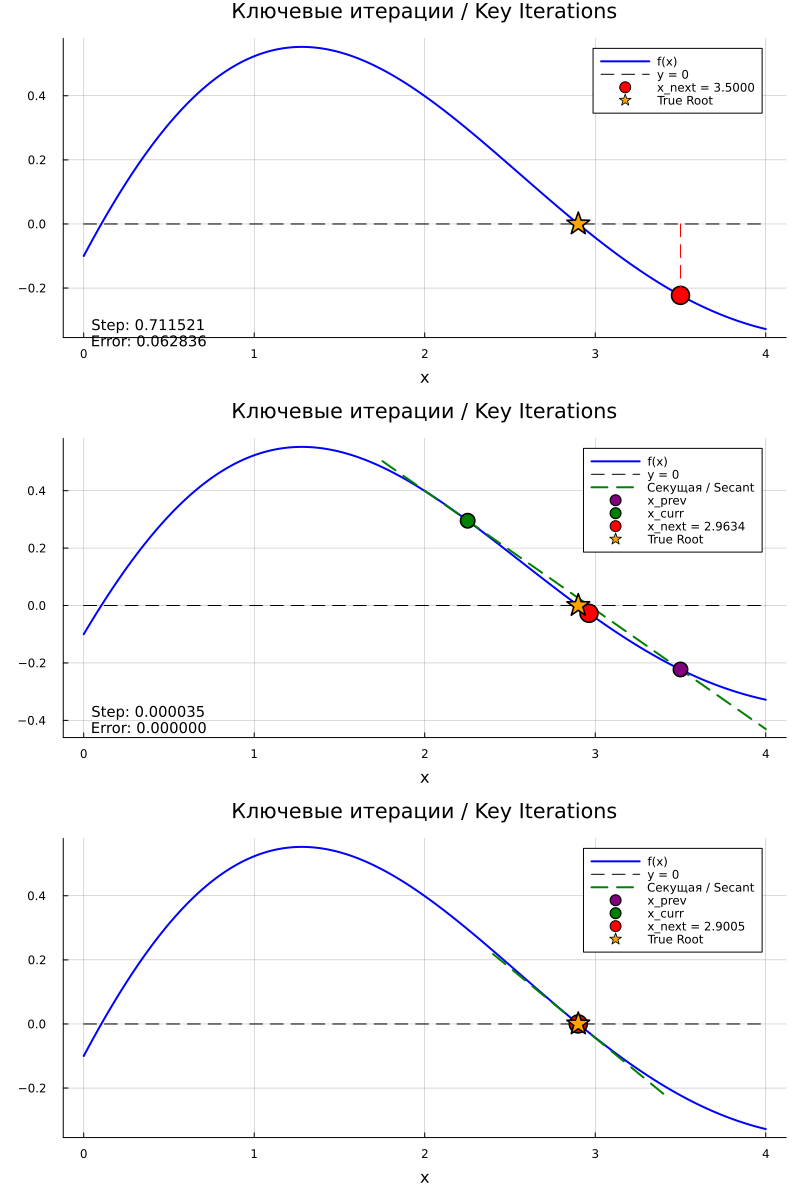

Создание статичных графиков для ключевых итераций...
Creating static plots for key iterations...
✓ Графики созданы / Plots created


In [39]:
# ============================================================================
# Ячейка 6: Статичная визуализация (без Interact)
# Static Visualization (without Interact)
# ============================================================================

# ✅ Этот вариант работает ВСЕГДА
# ✅ This option works ALWAYS

n_rows = nrow(history)

if n_rows > 0
    println("Создание статичных графиков для ключевых итераций...")
    println("Creating static plots for key iterations...")
    
    # Выбрать ключевые итерации
    # Select key iterations
    key_iterations = [1]
    if n_rows >= 3
        push!(key_iterations, div(n_rows, 2))
    end
    push!(key_iterations, n_rows)
    
    # Создать массив графиков
    # Create array of plots
    plots = []
    for iter in key_iterations
        p = plot_secant_step(history, iter, x₀, x₁, true_root, f)
        push!(plots, p)
    end
    
    # Объединить графики
    # Combine plots
    if length(plots) >= 2
        display(plot(plots..., layout=(length(plots), 1), 
             size=(800, 400 * length(plots)),
             title="Ключевые итерации / Key Iterations"))
    else
        display(plots[1])
    end
    
    println("✓ Графики созданы / Plots created")
end

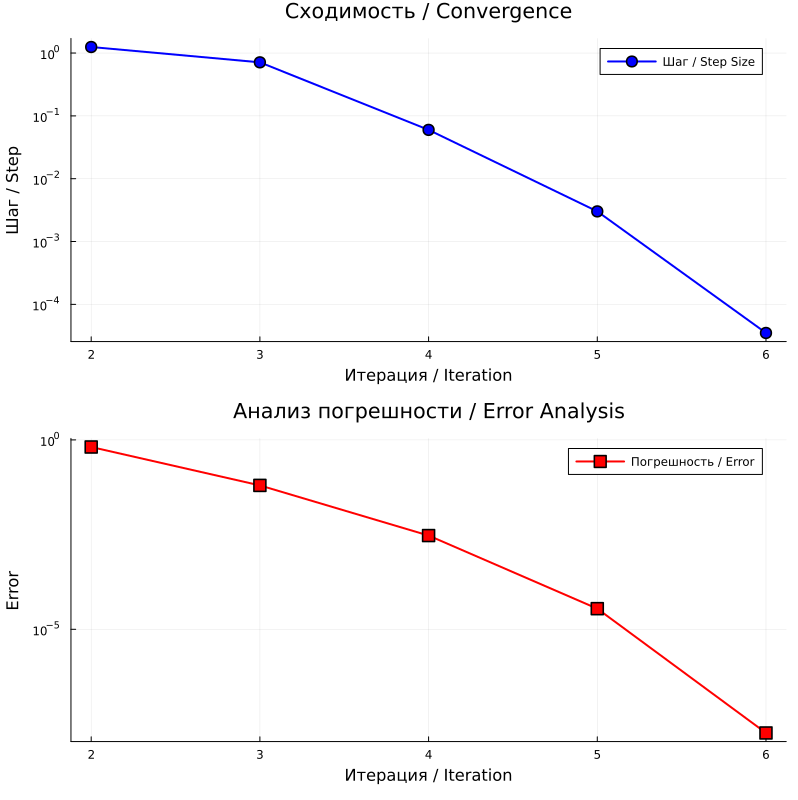

In [40]:
# ============================================================================
# Ячейка 7: График сходимости / Convergence Plot
# ============================================================================

function plot_convergence_secant(history)
    plot_history = history[history.Iteration .>= 2, :]
    
    if nrow(plot_history) == 0
        println("⚠️ Недостаточно данных / Insufficient data")
        return nothing
    end
    
    p1 = plot(plot_history.Iteration, plot_history.Step_Size,
              marker=:circle, markersize=6, linewidth=2, color=:blue,
              label="Шаг / Step Size",
              xlabel="Итерация / Iteration",
              ylabel="Шаг / Step",
              title="Сходимость / Convergence",
              size=(800, 400),
              yaxis=:log, grid=true)
    
    p2 = plot(plot_history.Iteration, plot_history.Error,
              marker=:square, markersize=6, linewidth=2, color=:red,
              label="Погрешность / Error",
              xlabel="Итерация / Iteration",
              ylabel="Error",
              title="Анализ погрешности / Error Analysis",
              size=(800, 400),
              yaxis=:log, grid=true)
    
    plot(p1, p2, layout=(2, 1), size=(800, 800))
end

plot_convergence_secant(history)